# CapsNets on Mnist dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__
%matplotlib inline

In [2]:
# Setting PATH to import utils functions from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from utils.load_data import load_mnist

## Loading dataset and normalising

In [3]:
(X_train, y_train), (X_test , y_test) = load_mnist(size=(1024, 512))

X_train.shape, y_train.shape

(TensorShape([1024, 28, 28, 1]), (1024,))

1024 images of size 28x28 over one channel

## Sample visualisation

In [4]:
classes = np.arange(10)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

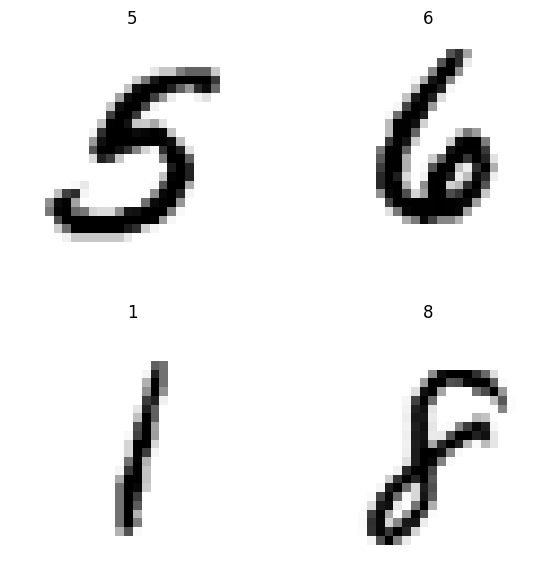

In [5]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(y_train[rand_index])
  plt.axis(False)

## Build CapsNet model

In [6]:
# Setting PATH to import CapsNet class from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from CapsNet import CapsNet

In [7]:
params = {
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
    "dense_1": 512,
    "dense_2": 1024
}

model = CapsNet(**params)
model._name = 'CapsNet-MNIST'
model.compile()
model.summary()

Model: "CapsNet-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense (Dense)               multiple                  0 (unused)
                                                                 
 dense_1 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X_train, y_train, tf.keras.optimizers.Adam(), train_metrics=['accuracy', 'precision', 'recall', 'f1'], validation=(X_test, y_test))

Epoch 10/10: 100%|██████████| 16/16 [00:05<00:00,  2.95it/s]

Validation loss is not decreasing anymore, risk of overfitting the model after 10 epochs. The training will be stopped. This behavior can be modified by setting the early_stop property of the model to False


{'accuracy': ListWrapper([0.7783203125, 0.900390625, 0.9375, 0.96484375, 0.978515625, 0.984375, 0.994140625, 0.9970703125, 0.998046875]),
 'precision': ListWrapper([0.8137331902950693, 0.9030638651790666, 0.9386124165940787, 0.9650784366609307, 0.9789120256672206, 0.9845453677585463, 0.9942492340686274, 0.9971086090686274, 0.9980851715686274]),
 'recall': ListWrapper([0.7783203125, 0.900390625, 0.9375, 0.96484375, 0.978515625, 0.984375, 0.994140625, 0.9970703125, 0.998046875]),
 'f1': ListWrapper([0.7711875951900229, 0.8998300345814776, 0.9372796831623952, 0.9648351912612358, 0.9785054091143377, 0.9843497727997115, 0.9941506389729581, 0.997075281100112, 0.9980515311770161]),
 'loss': ListWrapper([0.8081552572548389, 0.3185315756127238, 0.18984975758939981, 0.12734722113236785, 0.08748156251385808, 0.0648380781058222, 0.047943860408850014, 0.037152168806642294, 0.030667090322822332]),
 'val_accuracy': ListWrapper([0.68359375, 0.8125, 0.90234375, 0.93359375, 0.9453125, 0.951171875, 0.951

,precision,recall,f1-score,support
0,0.933333,1.000000,0.965517,42.000000
1,1.000000,1.000000,1.000000,69.000000
2,1.000000,0.964286,0.981818,56.000000
3,0.956522,0.916667,0.936170,48.000000
4,0.963636,0.946429,0.954955,56.000000
5,0.909091,0.961538,0.934579,52.000000
6,0.976190,0.931818,0.953488,44.000000
7,0.941176,0.960000,0.950495,50.000000
8,1.000000,0.900000,0.947368,40.000000
9,0.915254,0.981818,0.947368,55.000000


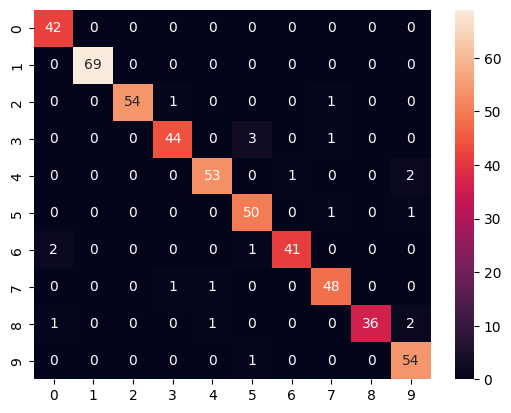

In [9]:
model.evaluate(X_test, y_test, np.arange(10))

## Loading and saving

Saving model under /saved_models/CapsNet-MNIST


INFO:tensorflow:Assets written to: ../saved_models/CapsNet-MNIST/assets


INFO:tensorflow:Assets written to: ../saved_models/CapsNet-MNIST/assets


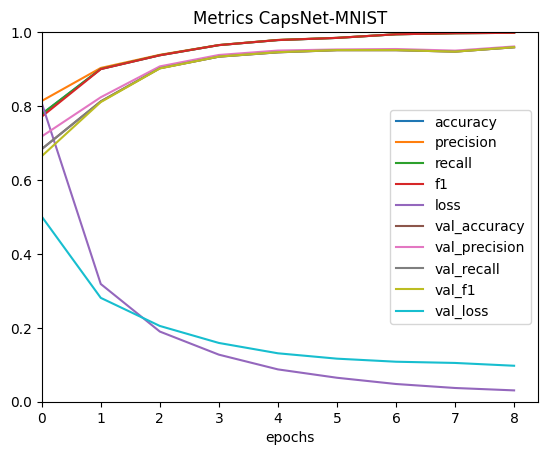

In [10]:
model.save()

In [11]:
loaded_model = tf.keras.models.load_model('../saved_models/CapsNet-MNIST', custom_objects={'CapsNet': CapsNet})
loaded_model.compile()
loaded_model.summary()

Model: "CapsNet-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  10496     
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  2654464   
                                                                 
 dense (Dense)               multiple                  82432     
                                                                 
 dense_1 (Dense)             multiple                  525312    
                                                                 
 dense (Dense)               multiple                  803600    
                                                                 
Total params: 5,550,864
Trainable params: 5,550,864
Non-trainable params: 0
_________________________________________________________________
